In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [2]:
import tqdm

# Darkstore map

In [3]:
darkstore_map = pd.read_csv('darkstore_map.csv', sep=';')

In [4]:
darkstore_map.head()

,SECTION,LEVEL,LAGERID
0,1,1,1
1,1,2,2
2,1,3,3
3,2,1,4
4,2,2,5


In [5]:
darkstore_map.shape

(132, 3)

In [6]:
darkstore_map.SECTION.nunique()

44

In [7]:
darkstore_map.SECTION.value_counts()

1     3
2     3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    3
24    3
23    3
22    3
11    3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
12    3
21    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
44    3
Name: SECTION, dtype: int64

# checques

In [8]:
cheques  = pd.read_csv('cheques_public.csv', sep=';')

In [9]:
cheques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25120 entries, 0 to 25119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CHEQUEID  25120 non-null  int64  
 1   LAGERID   25120 non-null  int64  
 2   KOLVO     25120 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 588.9 KB


In [10]:
cheques.head(5)

,CHEQUEID,LAGERID,KOLVO
0,22311,1,1.0
1,22311,2,1.0
2,22311,3,1.0
3,22311,4,1.0
4,22311,5,1.0


In [11]:
cheques['CHEQUEID'].unique()[:5]

array([22311, 22314, 22317, 22321, 22324])

In [14]:
cheques.groupby('CHEQUEID')['LAGERID'].apply(len).max()

26

In [25]:
cheques = pd.merge(cheques, darkstore_map, on = ['LAGERID'], how='left')

In [26]:
cheques['CHEQUEID'].nunique()

5822

In [31]:
cheques[cheques['CHEQUEID']==22324]

,CHEQUEID,LAGERID,KOLVO,SECTION,LEVEL
21,22324,20,1.0,7,2
22,22324,14,1.0,5,2
23,22324,21,1.0,7,3


<AxesSubplot:ylabel='Count'>

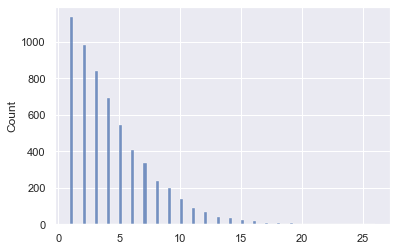

In [34]:
sns.histplot(cheques.groupby('CHEQUEID').apply(len), bins=100)

In [35]:
cheques.groupby('CHEQUEID').apply(len).max()

26

In [36]:
cheques.groupby('CHEQUEID').apply(len).min()

1

In [37]:
cheques.groupby('CHEQUEID').apply(len).median()

3.0

In [38]:
cheques.groupby('CHEQUEID').apply(len).mean()

4.314668498797664

In [40]:
cheques['LAGERID'].value_counts()[:10]

15     1467
29     1119
3       636
7       608
57      523
14      495
30      476
2       424
116     388
42      373
Name: LAGERID, dtype: int64

In [90]:
cheques.drop_duplicates(['LAGERID','LEVEL']).shape

(132, 6)

In [50]:
cheques_lagerid_agg = cheques['LAGERID'].value_counts().to_frame()

In [54]:
cheques_lagerid_agg = cheques_lagerid_agg.reset_index().rename(columns={'LAGERID':'counts','index': 'LAGERID'})

In [59]:
cheques_lagerid_agg = cheques_lagerid_agg.merge(cheques.groupby('LAGERID')['KOLVO'].sum().to_frame().reset_index(), on = 'LAGERID', how='left')

In [60]:
cheques_lagerid_agg['overall_quantity'] = cheques_lagerid_agg['KOLVO']*cheques_lagerid_agg['counts']

In [70]:
cheques_lagerid_agg.sort_values(by='overall_quantity', ascending=False)[:15]

,LAGERID,counts,KOLVO,overall_quantity
0,15,1467,2248.0,3297816.0
1,29,1119,1573.0,1760187.0
14,44,354,2254.0,797916.0
7,2,424,1858.0,787792.0
3,7,608,854.0,519232.0
2,3,636,740.0,470640.0
4,57,523,650.0,339950.0
13,123,354,840.0,297360.0
5,14,495,542.0,268290.0
8,116,388,679.0,263452.0


In [76]:
cheques = cheques.merge(cheques_lagerid_agg[['LAGERID','overall_quantity']],on='LAGERID')

In [77]:
cheques.head()

,CHEQUEID,LAGERID,KOLVO,SECTION,LEVEL,overall_quantity
0,22311,1,1.0,1,1,30672.0
1,22936,1,1.0,1,1,30672.0
2,23144,1,1.0,1,1,30672.0
3,23190,1,1.0,1,1,30672.0
4,23293,1,1.0,1,1,30672.0


In [92]:
cheques.sort_values(by='overall_quantity', ascending=False).drop_duplicates('LAGERID')[:15]['LEVEL'].value_counts()

3    9
2    5
1    1
Name: LEVEL, dtype: int64

In [93]:
cheques.sort_values(by='overall_quantity', ascending=False).drop_duplicates('LAGERID')[:15]['SECTION'].value_counts()

5     2
10    2
1     2
15    1
3     1
19    1
41    1
39    1
23    1
9     1
14    1
38    1
Name: SECTION, dtype: int64

In [141]:
cheques.sort_values(by='overall_quantity', ascending=False)

,CHEQUEID,LAGERID,KOLVO,SECTION,LEVEL,overall_quantity
3862,26353,15,2.0,5,3,3297816.0
4027,28047,15,2.0,5,3,3297816.0
4029,28053,15,2.0,5,3,3297816.0
4030,28066,15,1.0,5,3,3297816.0
4031,28081,15,1.0,5,3,3297816.0
...,...,...,...,...,...,...
2285,23458,8,1.0,3,2,7719.0
2284,23381,8,1.0,3,2,7719.0
2283,23377,8,2.0,3,2,7719.0
2282,23365,8,1.0,3,2,7719.0


In [187]:
most_pop = cheques.sort_values(by='overall_quantity', ascending=False).drop_duplicates('LAGERID')['LAGERID'].values

In [188]:
most_pop

array([ 15,  29,  44,   2,   7,   3,  57, 123,  14, 116,  30,  69,  27,
        42, 114,  53,  26,  98, 130,  83, 129,  25, 100,  12,   5,  21,
        51, 122,  90, 119,  32,  31,  60,  70,  77,  41,  50,  55,  19,
        17,  78,  54,  87,  33,  37, 126,  85,  22,  18, 109,  92, 118,
        79,  91,  95,  81,  20, 107,  88,  89,   1,  28,  80,  64,  52,
       106,  23, 104,  48,  66,   6,   4,  75,  68,  40,  38,   9, 105,
        45,  99,  71,  46,  16,  84, 121, 115,  39,  10,  74, 125,  82,
        67,  62,  24, 117, 110, 131,  61,  59,  94, 108,  35,  97, 112,
       127,  58,  72,  47,  43,  49, 128,  86,  13,  11,  36, 111,  93,
        34, 132,  73, 124,  96,  63, 103, 113, 102,  65, 101,  76, 120,
        56,   8])

In [189]:
agg_cheques = cheques.groupby('CHEQUEID')['LAGERID'].apply(list).to_frame()

In [190]:
len(agg_cheques)

5822

In [200]:
agg_cheques

,LAGERID
CHEQUEID,
22311,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
22314,"[11, 12, 13, 14]"
22317,"[7, 15, 16, 17]"
22321,"[3, 18, 19]"
22324,"[14, 20, 21]"
...,...
36623,"[2, 29, 34, 40, 53, 64, 72]"
36625,[1]
36628,"[3, 15]"


## checking correlation

In [191]:
most_pop

array([ 15,  29,  44,   2,   7,   3,  57, 123,  14, 116,  30,  69,  27,
        42, 114,  53,  26,  98, 130,  83, 129,  25, 100,  12,   5,  21,
        51, 122,  90, 119,  32,  31,  60,  70,  77,  41,  50,  55,  19,
        17,  78,  54,  87,  33,  37, 126,  85,  22,  18, 109,  92, 118,
        79,  91,  95,  81,  20, 107,  88,  89,   1,  28,  80,  64,  52,
       106,  23, 104,  48,  66,   6,   4,  75,  68,  40,  38,   9, 105,
        45,  99,  71,  46,  16,  84, 121, 115,  39,  10,  74, 125,  82,
        67,  62,  24, 117, 110, 131,  61,  59,  94, 108,  35,  97, 112,
       127,  58,  72,  47,  43,  49, 128,  86,  13,  11,  36, 111,  93,
        34, 132,  73, 124,  96,  63, 103, 113, 102,  65, 101,  76, 120,
        56,   8])

In [192]:
most_pop

array([ 15,  29,  44,   2,   7,   3,  57, 123,  14, 116,  30,  69,  27,
        42, 114,  53,  26,  98, 130,  83, 129,  25, 100,  12,   5,  21,
        51, 122,  90, 119,  32,  31,  60,  70,  77,  41,  50,  55,  19,
        17,  78,  54,  87,  33,  37, 126,  85,  22,  18, 109,  92, 118,
        79,  91,  95,  81,  20, 107,  88,  89,   1,  28,  80,  64,  52,
       106,  23, 104,  48,  66,   6,   4,  75,  68,  40,  38,   9, 105,
        45,  99,  71,  46,  16,  84, 121, 115,  39,  10,  74, 125,  82,
        67,  62,  24, 117, 110, 131,  61,  59,  94, 108,  35,  97, 112,
       127,  58,  72,  47,  43,  49, 128,  86,  13,  11,  36, 111,  93,
        34, 132,  73, 124,  96,  63, 103, 113, 102,  65, 101,  76, 120,
        56,   8])

In [193]:
frequency = {}
for item in tqdm.tqdm(most_pop):
    tmp_freq = {}
    for cheque in agg_cheques.LAGERID.values:
        if item in cheque:
            for i in cheque:
                if i!=item:
                    res = tmp_freq.get(i,0)
                    res+=1
                    tmp_freq.update({i:res})
                else:
                    tmp_freq.update({i:1})
    tmp_freq = list(tmp_freq.items())
    nodes, values = zip(*tmp_freq)
    values = np.array(values)/sum(values)
    tmp_freq = list(zip(nodes, values))
    tmp_freq = sorted(tmp_freq, key=lambda x: x[1], reverse=True)
    frequency.update({item:tmp_freq})

100%|████████████████████████████████████████| 132/132 [00:00<00:00, 163.41it/s]


In [194]:
len(frequency[5])

128

In [195]:
len(frequency)

132

In [196]:
unique_lagers = darkstore_map['LAGERID'].unique()

In [197]:
import copy

In [210]:
new_frequency = {}

for k,v in frequency.items():
    not_included = set(unique_lagers).difference([i[0] for i in v])
    new_value = copy.deepcopy(v)
    for i in not_included:
        new_value.append((i,0))
    new_frequency.update({k:new_value})

In [211]:
[len(i) for i in new_frequency.values()] 

[132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132]

In [212]:
new_frequency = [(k, sorted(v, key=lambda x: x[0])) for k,v in new_frequency.items()]

In [220]:
frequncy_df = pd.DataFrame()
for i in new_frequency:
    tmp_df = pd.DataFrame(i[1]).set_index(0).T
    tmp_df.index = [i[0]]
    frequncy_df = frequncy_df.append(tmp_df)


In [221]:
frequncy_df

,1,2,3,4,5,6,7,8,9,10,...,123,124,125,126,127,128,129,130,131,132
15,0.002028,0.010267,0.032704,0.006338,0.005324,0.006465,0.026366,0.003803,0.006084,0.005197,...,0.015972,0.003296,0.004056,0.006211,0.003803,0.006845,0.007606,0.012296,0.005958,0.005451
29,0.002734,0.009209,0.028489,0.007770,0.004317,0.004748,0.023022,0.002158,0.002878,0.004604,...,0.018129,0.003453,0.004748,0.006331,0.002302,0.003741,0.008345,0.013525,0.005324,0.004892
44,0.003010,0.010837,0.022276,0.006020,0.005418,0.008429,0.024684,0.002408,0.003612,0.004214,...,0.012643,0.001806,0.003010,0.009031,0.000602,0.003612,0.004214,0.010235,0.001204,0.006020
2,0.005634,0.000704,0.026056,0.007042,0.027465,0.002113,0.026761,0.006338,0.007042,0.007042,...,0.011268,0.002113,0.002817,0.007746,0.004930,0.003521,0.007042,0.008451,0.005634,0.004225
7,0.003491,0.011056,0.029386,0.005819,0.004364,0.005528,0.000291,0.004073,0.006983,0.004073,...,0.018039,0.004073,0.005819,0.009892,0.003491,0.002037,0.009310,0.011347,0.003782,0.003200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.011338,0.009070,0.022676,0.013605,0.002268,0.006803,0.020408,0.000000,0.004535,0.006803,...,0.004535,0.004535,0.002268,0.002268,0.006803,0.002268,0.000000,0.009070,0.000000,0.000000
76,0.002488,0.012438,0.009950,0.009950,0.002488,0.002488,0.027363,0.007463,0.002488,0.007463,...,0.019900,0.002488,0.007463,0.014925,0.002488,0.002488,0.007463,0.012438,0.007463,0.009950
120,0.000000,0.009728,0.023346,0.005837,0.003891,0.003891,0.023346,0.001946,0.005837,0.003891,...,0.011673,0.005837,0.003891,0.009728,0.000000,0.009728,0.001946,0.023346,0.013619,0.007782
56,0.002137,0.012821,0.021368,0.008547,0.000000,0.008547,0.019231,0.000000,0.012821,0.004274,...,0.014957,0.004274,0.002137,0.008547,0.004274,0.006410,0.012821,0.012821,0.002137,0.010684


In [240]:
!pip install k-means-constrained


     |████████████████████████████████| 440 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.0 MB 931 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 34.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/volodymyrkovenko/envs/hackathon_env/bin/python -m pip install --upgrade pip' command.


In [241]:
from k_means_constrained import KMeansConstrained

In [244]:
kmeans = KMeansConstrained(n_clusters=6, size_min=22,
     size_max=22,
     random_state=0)

In [245]:
kmeans.fit(frequncy_df)

KMeansConstrained(copy_x=True, init='k-means++', max_iter=300, n_clusters=6,
         n_init=10, n_jobs=1, random_state=0, size_max=22, size_min=22,
         tol=0.0001, verbose=False)

In [246]:
prediction = kmeans.predict(frequncy_df)

In [247]:
nodes, values = np.unique(prediction, return_counts=True)

In [248]:
list(zip(nodes, values))

[(0, 22), (1, 22), (2, 22), (3, 22), (4, 22), (5, 22)]

In [249]:
frequncy_df['label'] = prediction

In [260]:
frequncy_df[frequncy_df['label']==4]

,1,2,3,4,5,6,7,8,9,10,...,124,125,126,127,128,129,130,131,132,label
15,0.002028,0.010267,0.032704,0.006338,0.005324,0.006465,0.026366,0.003803,0.006084,0.005197,...,0.003296,0.004056,0.006211,0.003803,0.006845,0.007606,0.012296,0.005958,0.005451,4
30,0.002038,0.009610,0.025335,0.010775,0.004659,0.004950,0.018055,0.002912,0.002330,0.002330,...,0.004659,0.005824,0.005533,0.001165,0.005533,0.003786,0.009319,0.004077,0.002912,4
42,0.001747,0.006639,0.025507,0.009085,0.004193,0.010133,0.020615,0.002446,0.003145,0.003494,...,0.004542,0.005590,0.004892,0.002096,0.003494,0.008735,0.019567,0.003494,0.002795,4
114,0.003238,0.009308,0.024282,0.007689,0.005261,0.004452,0.025496,0.002428,0.002833,0.004047,...,0.006880,0.004856,0.006475,0.002833,0.004452,0.008499,0.015378,0.005666,0.004856,4
53,0.004988,0.010474,0.026434,0.011471,0.005985,0.006983,0.021446,0.001496,0.002494,0.003990,...,0.002993,0.003491,0.005985,0.002993,0.002494,0.010973,0.009476,0.001496,0.000998,4
12,0.004068,0.008136,0.024407,0.006102,0.003390,0.003390,0.027119,0.001356,0.001356,0.002712,...,0.005424,0.006102,0.006102,0.002712,0.003390,0.007458,0.010847,0.001356,0.001356,4
51,0.001171,0.009368,0.029859,0.016979,0.005855,0.010539,0.021663,0.003513,0.003513,0.004098,...,0.005855,0.003513,0.005269,0.001756,0.003513,0.007026,0.013466,0.002927,0.003513,4
32,0.002059,0.006176,0.028821,0.014411,0.003603,0.007720,0.021101,0.002573,0.003088,0.003603,...,0.002573,0.007205,0.005147,0.001544,0.003088,0.006691,0.012867,0.006176,0.002573,4
31,0.001122,0.006169,0.026921,0.012339,0.002804,0.010656,0.021873,0.005048,0.002243,0.002804,...,0.003365,0.005048,0.005609,0.002243,0.004487,0.009534,0.011778,0.002804,0.002243,4
60,0.001296,0.006481,0.023979,0.008425,0.002592,0.005185,0.023979,0.003889,0.001296,0.005185,...,0.005185,0.005185,0.005833,0.003240,0.005185,0.005833,0.012962,0.005185,0.003889,4


In [270]:
frequncy_df.loc[42].to_frame().T.drop(columns='label').T.sort_values(by=42, ascending=False).index

Index([ 29,  15,  31,  30,   3, 116,   7, 123,  98, 130,
       ...
        43, 127,  16, 106,  70,   1, 117,  96, 104,  42],
      dtype='object', name=0, length=132)

In [271]:
frequncy_df = frequncy_df.reset_index().rename(columns={'index':'LAGERID'})

In [272]:
frequncy_df.head()

,LAGERID,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,label
0,15,0.002028,0.010267,0.032704,0.006338,0.005324,0.006465,0.026366,0.003803,0.006084,...,0.003296,0.004056,0.006211,0.003803,0.006845,0.007606,0.012296,0.005958,0.005451,4
1,29,0.002734,0.009209,0.028489,0.007770,0.004317,0.004748,0.023022,0.002158,0.002878,...,0.003453,0.004748,0.006331,0.002302,0.003741,0.008345,0.013525,0.005324,0.004892,0
2,44,0.003010,0.010837,0.022276,0.006020,0.005418,0.008429,0.024684,0.002408,0.003612,...,0.001806,0.003010,0.009031,0.000602,0.003612,0.004214,0.010235,0.001204,0.006020,2
3,2,0.005634,0.000704,0.026056,0.007042,0.027465,0.002113,0.026761,0.006338,0.007042,...,0.002113,0.002817,0.007746,0.004930,0.003521,0.007042,0.008451,0.005634,0.004225,3
4,7,0.003491,0.011056,0.029386,0.005819,0.004364,0.005528,0.000291,0.004073,0.006983,...,0.004073,0.005819,0.009892,0.003491,0.002037,0.009310,0.011347,0.003782,0.003200,0


In [273]:
frequncy_df.to_csv('clustered.csv',index=False)